<a href="https://colab.research.google.com/github/rahulakrish/real_estate_analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem
1. To develop a model for ACME Real Estate Agency to accurately predict a value of a house based on avaliable data. This will help their clients, either buy or sell their homes at a fair price.
2. To identify if renovations can be made to improve the selling price of the house.

## Methodology
By developing using a Linear Regression model, we will try to predict the selling price of a house based on attributes like size, number of bedrooms/bathroorms etc. WE will also try to minimize the RMSE value to achieve maximum efficiency.

## Dataset
Dataset used will be the King County House Sales dataset : `kc_house_data.csv`

##Analysis

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing files
#getting the file from the github repo
url = 'https://raw.githubusercontent.com/rahulakrish/real_estate_analysis/main/kc_house_data.csv'
df = pd.read_csv(url)

#checking to see
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using the `date` info to categorize seasons to check for possible seasonal differences in the sale prices.

In [ ]:
#getting the month data first
df['date'] = df['date'].astype('datetime64[ns]')
df['month_of_sale'] = df['date'].dt.month

In [ ]:
# creating a dict to convert the numeric value into month
months  = {1 : 'January',
           2 : 'February',
           3 : 'March',
           4 : 'April',
           5 : 'May',
           6 : 'June',
           7 : 'July',
           8 : 'August',
           9 : 'September',
           10 : 'October',
           11 : 'November',
           12 : 'December'}

#applying it to the df
df['month_of_sale'] = df['month_of_sale'].map(months)

In [ ]:
# defining seasons and adding to the df
seasons = {'March' : 'Spring',
          'April' : 'Spring',
          'May' : 'Spring',
          'June' : 'Summer',
          'July' : 'Summer',
          'August' : 'Summer',
          'September' : 'Autumn',
          'October' : 'Autumn',
          'November' : 'Autumn',
          'December' : 'Winter',
          'January' : 'Winter',
          'February' : 'Winter'}

#applying it to the df
df['season'] = df['month_of_sale'].map(seasons)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_sale,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,October,Autumn
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,February,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,December,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,February,Winter


In [ ]:
#creating a copy of the df for the analysis
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
#imputing the median value for sqft_above
median = df1['sqft_above'].median
df1['sqft_above'].fillna(median,inplace=True)

In [ ]:
# removing the id column since it is not relevant for the analysis
df1.drop('id',axis=1,inplace=True)

### Since, `season` is of `object` data type, it needs to be converted into an integer to show up in the heat map. For this, we will employ `OneHotEncoder`.

In [ ]:
# importing the relevant library
from sklearn.preprocessing import OneHotEncoder
seasons = df1[['season']]

#instantiate
encoder_seasons = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')

#fit it to the data
encoder_seasons.fit(seasons)

#inspecting the categories
encoder_seasons.categories_


[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [ ]:
#transforming the data
seasons_encoded = encoder_seasons.transform(seasons)
seasons_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [ ]:
#converting the encoded values into a df
seasons_encoded_df = pd.DataFrame(data=seasons_encoded,index=df1.index)
seasons_encoded_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [ ]:
#renaming the columns to readability
seasons_encoded_df.rename(columns = {0:'Autumn',1:'Spring',2:'Summer',3:'Winter'},inplace=True)

In [ ]:
# adding the encoded values to df1
df1 = pd.concat([df1,seasons_encoded_df],axis=1)
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,month_of_sale,season,Autumn,Spring,Summer,Winter
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,October,Autumn,1.0,0.0,0.0,0.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,December,Winter,0.0,0.0,0.0,1.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,February,Winter,0.0,0.0,0.0,1.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,December,Winter,0.0,0.0,0.0,1.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,February,Winter,0.0,0.0,0.0,1.0


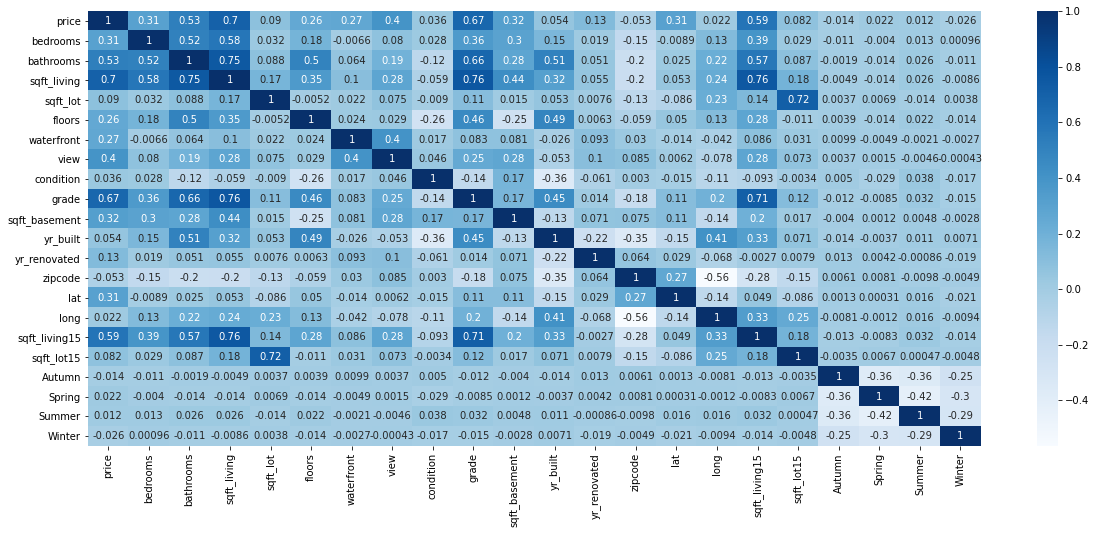

In [ ]:
# looking at the updated heatmap
import seaborn as sns
fig,ax = plt.subplots(figsize=(20,8))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

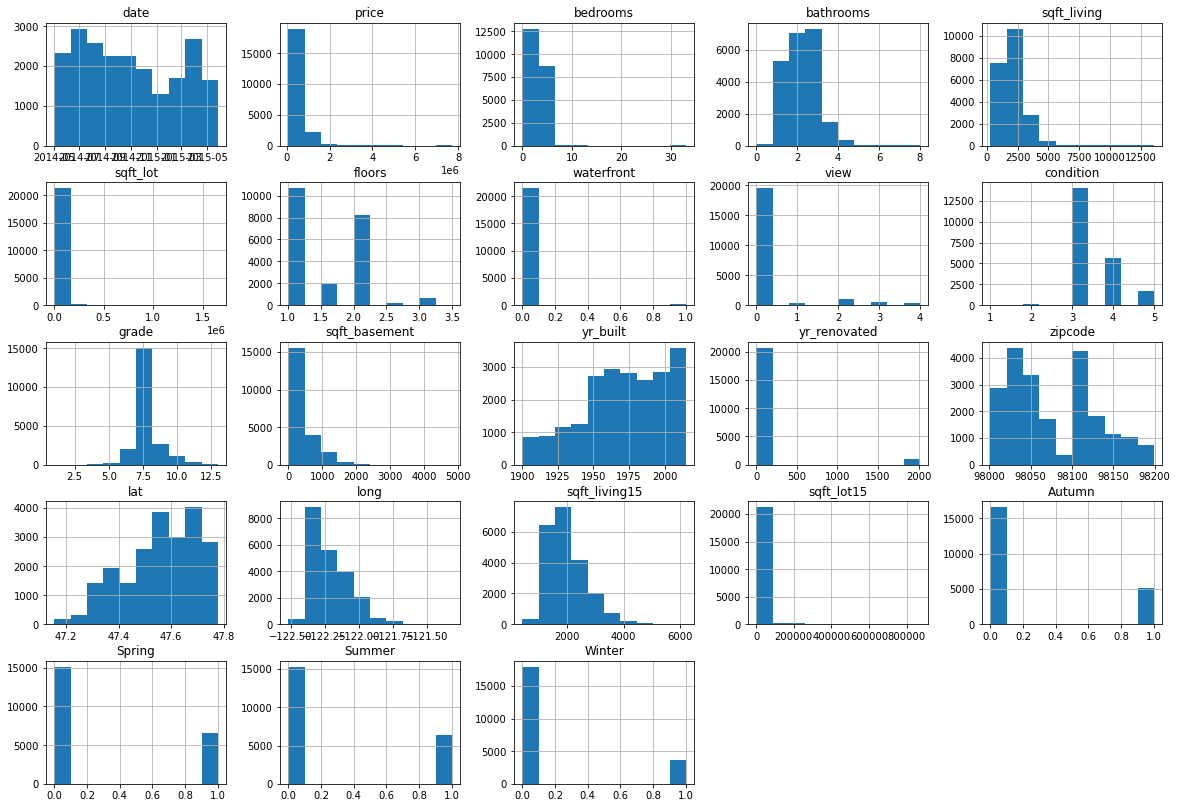

In [ ]:
# viewing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,14))
pd.plotting.hist_frame(df1,ax=ax);

# Building the model with `statsmodel` - baseline

In [ ]:
#import the library
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# droppping irrelevant data
df1.drop(['date','month_of_sale','season'],axis=1,inplace=True)
df1.drop('sqft_above',axis=1,inplace=True) # since it is high correlation with sqft_living(0.88)

In [ ]:
#building the baseline model
outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_baseline = ols(formula=f,data=df1).fit()

model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2530.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:43   Log-Likelihood:            -2.9456e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21592   BIC:                         5.893e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.416e+06   2.34e+06      2.314      0.021    8.28e+05       1e+07
bedrooms      -3.595e+04   1888.466    -19.035      0.000   -3.96e+04   -3.22e+04
bathrooms       4.13e+04   3247.692     12.717      0.000    3.49e+04    4.77e+04
sqft_living     181.6648      3.662     49.612      0.000     174.488     188.842
sqft_lot          0.1272      0.048      2.658      0.008       0.033       0.221
floors         6984.6495   3589.681      1.946      0.052     -51.390     1.4e+04
waterfront     5.838e+05   1.73e+04     33.694      0.000     5.5e+05    6.18e+05
view           5.276e+04   2136.214     24.699      0.000    4.86e+04    5.69e+04
condition      2.708e+04   2350.074     11.524      0.000    2.25e+04    3.17e+04
grade          9.574e+04   2149.002     44.552      0.000    9.15e+04       1e+05
sqft_basement   -31.4945      4.352     -7.236      0.000     -40.025     -22.964
yr_built      -2619.2555     72.527    -36.114      0.000   -2761.414   -2477.097
yr_renovated     19.7768      3.649      5.419      0.000      12.624      26.929
zipcode        -583.9780     32.925    -17.737      0.000    -648.513    -519.443
lat            6.029e+05   1.07e+04     56.262      0.000    5.82e+05    6.24e+05
long          -2.152e+05   1.31e+04    -16.416      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.6406      3.442      6.288      0.000      14.895      28.387
sqft_lot15       -0.3856      0.073     -5.272      0.000      -0.529      -0.242
Autumn         1.346e+06   5.85e+05      2.300      0.021    1.99e+05    2.49e+06
Spring         1.375e+06   5.85e+05      2.349      0.019    2.28e+05    2.52e+06
Summer         1.348e+06   5.85e+05      2.303      0.021    2.01e+05    2.49e+06
Winter         1.348e+06   5.85e+05      2.304      0.021    2.01e+05     2.5e+06
==============================================================================
Omnibus:                    18430.723   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1899541.916
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.367   Cond. No.                     1.02e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print(f'R-squared value for baseline model = {round((model_baseline.rsquared),3)}')

R-squared value for baseline model = 0.701


In [ ]:
#looking at the summary statistics for each variable
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Autumn,Spring,Summer,Winter
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.234257,0.301670,0.292926,0.171147
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.423543,0.458994,0.455115,0.376646
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000


#### From the above, we can see that the `standard deviaton` for `[sqft living,sqft_lot,sqft_living15,sqft_lot15,yr_renovated]` are quite high

In [ ]:
# examining yr_renovated
df1['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### Looks like `yr_renovated` has 20699 rows of 0 values, indicating that nearly 96% of the houses in the dataset have not been renovated. Hence, we can factor it out from our analysis - model_1

In [ ]:
#dropping yr_renovated
df1.drop('yr_renovated',axis=1,inplace=True)

In [ ]:
#running the model again
outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_1 = ols(formula=f,data=df1).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2658.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:43   Log-Likelihood:            -2.9457e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21593   BIC:                         5.893e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.338e+06   2.34e+06      2.713      0.007    1.76e+06    1.09e+07
bedrooms      -3.628e+04   1888.690    -19.210      0.000      -4e+04   -3.26e+04
bathrooms      4.363e+04   3221.336     13.543      0.000    3.73e+04    4.99e+04
sqft_living     181.6754      3.664     49.583      0.000     174.494     188.857
sqft_lot          0.1236      0.048      2.583      0.010       0.030       0.217
floors         8009.7234   3587.048      2.233      0.026     978.844     1.5e+04
waterfront      5.89e+05   1.73e+04     34.025      0.000    5.55e+05    6.23e+05
view           5.313e+04   2136.560     24.865      0.000    4.89e+04    5.73e+04
condition      2.488e+04   2316.347     10.743      0.000    2.03e+04    2.94e+04
grade          9.616e+04   2149.027     44.746      0.000    9.19e+04       1e+05
sqft_basement   -31.2853      4.355     -7.184      0.000     -39.821     -22.749
yr_built      -2744.6428     68.783    -39.903      0.000   -2879.463   -2609.823
zipcode        -588.7554     32.935    -17.876      0.000    -653.310    -524.201
lat            6.006e+05   1.07e+04     56.055      0.000     5.8e+05    6.22e+05
long          -2.126e+05   1.31e+04    -16.214      0.000   -2.38e+05   -1.87e+05
sqft_living15    20.6390      3.439      6.001      0.000      13.898      27.380
sqft_lot15       -0.3800      0.073     -5.193      0.000      -0.523      -0.237
Autumn         1.577e+06   5.84e+05      2.699      0.007    4.32e+05    2.72e+06
Spring         1.605e+06   5.84e+05      2.748      0.006     4.6e+05    2.75e+06
Summer         1.578e+06   5.84e+05      2.702      0.007    4.34e+05    2.72e+06
Winter         1.578e+06   5.84e+05      2.702      0.007    4.34e+05    2.72e+06
==============================================================================
Omnibus:                    18429.820   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1896654.926
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      48.332   Cond. No.                     1.19e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')

R-squared value for the baseline model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 


### Let's look at the predictor variables and get an idea of how they are distributed. For linear regression, while normality of the predictors is not an assumption, but it does help the model if the predictors are normally distributed

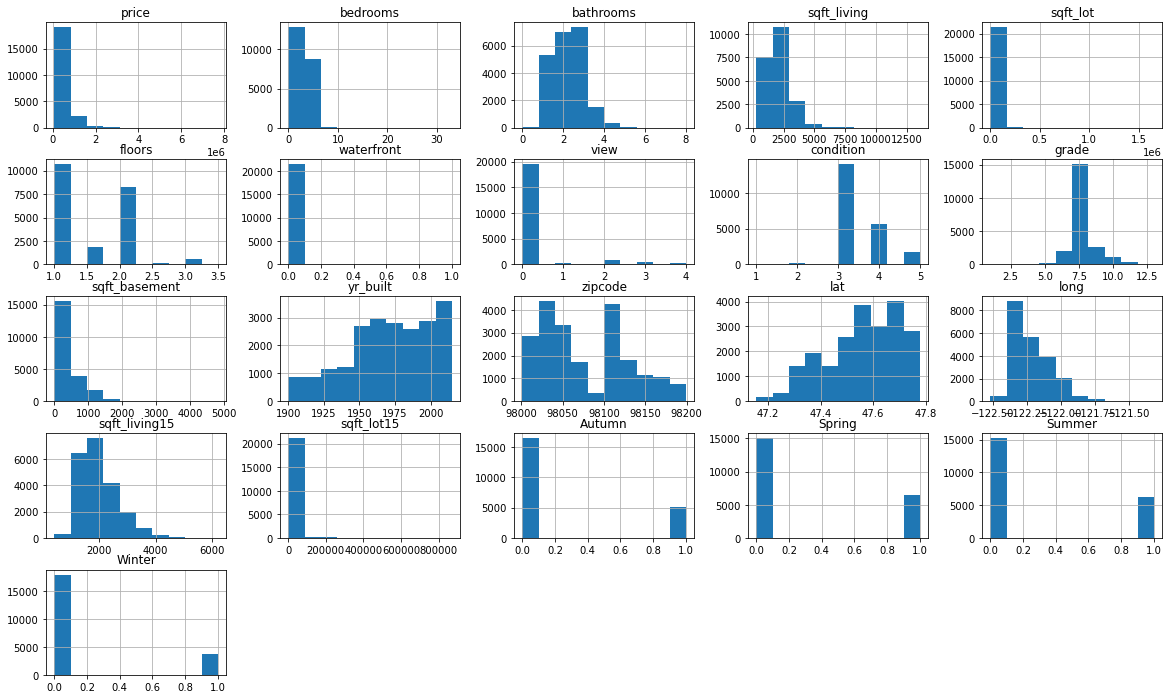

In [ ]:
#visualizing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,12))
pd.plotting.hist_frame(df1,ax= ax);

## transforming  `price` using log transform - model_2

In [ ]:
#transforming price
df1['price'] = df1['price'].map(lambda x : np.log(x))

# modelling with the transformed price
outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_2 = ols(formula=f,data=df1).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3838.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:46   Log-Likelihood:                -856.18
No. Observations:               21613   AIC:                             1752.
Df Residuals:                   21593   BIC:                             1912.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2382      2.927     -0.765      0.445      -7.976       3.500
bedrooms         -0.0131      0.002     -5.546      0.000      -0.018      -0.008
bathrooms         0.0737      0.004     18.247      0.000       0.066       0.082
sqft_living       0.0001   4.59e-06     29.793      0.000       0.000       0.000
sqft_lot       4.633e-07      6e-08      7.723      0.000    3.46e-07    5.81e-07
floors            0.0775      0.004     17.238      0.000       0.069       0.086
waterfront        0.3823      0.022     17.622      0.000       0.340       0.425
view              0.0609      0.003     22.755      0.000       0.056       0.066
condition         0.0597      0.003     20.562      0.000       0.054       0.065
grade             0.1594      0.003     59.198      0.000       0.154       0.165
sqft_basement    1.5e-05   5.46e-06      2.749      0.006    4.31e-06    2.57e-05
yr_built         -0.0036   8.62e-05    -42.227      0.000      -0.004      -0.003
zipcode          -0.0007   4.13e-05    -15.938      0.000      -0.001      -0.001
lat               1.3958      0.013    103.963      0.000       1.369       1.422
long             -0.1554      0.016     -9.460      0.000      -0.188      -0.123
sqft_living15  9.658e-05   4.31e-06     22.411      0.000    8.81e-05       0.000
sqft_lot15     -2.57e-07   9.17e-08     -2.803      0.005   -4.37e-07   -7.72e-08
Autumn           -0.5734      0.732     -0.784      0.433      -2.008       0.861
Spring           -0.5234      0.732     -0.715      0.475      -1.958       0.911
Summer           -0.5681      0.732     -0.776      0.438      -2.003       0.866
Winter           -0.5733      0.732     -0.783      0.433      -2.008       0.861
==============================================================================
Omnibus:                      401.199   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              835.932
Skew:                          -0.038   Prob(JB):                    3.02e-182
Kurtosis:                       3.960   Cond. No.                     1.19e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')
print(f'R-squared value for model_2 = ',model_2.rsquared, ' - transforming price using log transform')

R-squared value for the baseline_model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 
R-squared value for model_2 =  0.7715173571062647  - transforming price using log transform


### Since transforming `price` increased the R^2 values, we can try transforming some of the other variables to see if it improves the model

In [ ]:
#transforming the following varibale
df1['sqft_living'] = df1['sqft_living'].map(lambda x: np.log(x))

In [ ]:
# modelling with transformed sqft_living
outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_3 = ols(formula=f,data=df1).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3882.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:46   Log-Likelihood:                -759.52
No. Observations:               21613   AIC:                             1559.
Df Residuals:                   21593   BIC:                             1719.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.1405      2.921     -2.102      0.036     -11.867      -0.414
bedrooms         -0.0241      0.002     -9.824      0.000      -0.029      -0.019
bathrooms         0.0732      0.004     18.362      0.000       0.065       0.081
sqft_living       0.3182      0.010     33.010      0.000       0.299       0.337
sqft_lot       5.014e-07   5.96e-08      8.407      0.000    3.85e-07    6.18e-07
floors            0.0728      0.004     16.233      0.000       0.064       0.082
waterfront        0.3955      0.022     18.329      0.000       0.353       0.438
view              0.0638      0.003     23.911      0.000       0.059       0.069
condition         0.0551      0.003     19.084      0.000       0.049       0.061
grade             0.1609      0.003     61.242      0.000       0.156       0.166
sqft_basement  1.133e-05   5.39e-06      2.101      0.036    7.59e-07    2.19e-05
yr_built         -0.0038    8.5e-05    -45.105      0.000      -0.004      -0.004
zipcode          -0.0006   4.11e-05    -15.466      0.000      -0.001      -0.001
lat               1.3967      0.013    104.536      0.000       1.371       1.423
long             -0.1630      0.016     -9.964      0.000      -0.195      -0.131
sqft_living15  9.748e-05   4.22e-06     23.111      0.000    8.92e-05       0.000
sqft_lot15    -2.273e-07   9.12e-08     -2.491      0.013   -4.06e-07   -4.84e-08
Autumn           -1.5487      0.730     -2.120      0.034      -2.980      -0.117
Spring           -1.4990      0.730     -2.052      0.040      -2.931      -0.067
Summer           -1.5443      0.730     -2.114      0.034      -2.976      -0.113
Winter           -1.5486      0.730     -2.120      0.034      -2.980      -0.117
==============================================================================
Omnibus:                      333.208   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.777
Skew:                           0.054   Prob(JB):                    1.44e-138
Kurtosis:                       3.833   Cond. No.                     1.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')
print('R-squared value for model_2 = ',model_2.rsquared, ' - transforming price using log transform')
print('R-squared value for model_3 = ',model_3.rsquared, ' - transforming sqft_living using log transform')

R-squared value for the baseline_model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 
R-squared value for model_2 =  0.7715173571062647  - transforming price using log transform
R-squared value for model_3 =  0.7735521196953913  - transforming sqft_living using log transform


In [ ]:
#transforming sqft_lot
df1['sqft_lot'] = df1['sqft_lot'].map(lambda x: np.log(x))

outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_4 = ols(formula=f,data=df1).fit()

model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3901.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:47   Log-Likelihood:                -720.17
No. Observations:               21613   AIC:                             1480.
Df Residuals:                   21593   BIC:                             1640.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7481      2.967      0.589      0.556      -4.067       7.563
bedrooms         -0.0237      0.002     -9.675      0.000      -0.028      -0.019
bathrooms         0.0702      0.004     17.602      0.000       0.062       0.078
sqft_living       0.3542      0.010     35.466      0.000       0.335       0.374
sqft_lot         -0.0387      0.003    -12.235      0.000      -0.045      -0.032
floors            0.0468      0.005      9.493      0.000       0.037       0.056
waterfront        0.4091      0.022     18.957      0.000       0.367       0.451
view              0.0655      0.003     24.600      0.000       0.060       0.071
condition         0.0546      0.003     18.946      0.000       0.049       0.060
grade             0.1616      0.003     61.630      0.000       0.156       0.167
sqft_basement -3.692e-06    5.5e-06     -0.671      0.502   -1.45e-05     7.1e-06
yr_built         -0.0040   8.53e-05    -46.796      0.000      -0.004      -0.004
zipcode          -0.0007   4.11e-05    -16.073      0.000      -0.001      -0.001
lat               1.3751      0.013    102.573      0.000       1.349       1.401
long             -0.1139      0.017     -6.859      0.000      -0.146      -0.081
sqft_living15     0.0001   4.24e-06     24.048      0.000    9.36e-05       0.000
sqft_lot15     9.347e-07   8.36e-08     11.184      0.000    7.71e-07     1.1e-06
Autumn            0.4237      0.742      0.571      0.568      -1.030       1.877
Spring            0.4726      0.742      0.637      0.524      -0.981       1.926
Summer            0.4275      0.742      0.576      0.564      -1.026       1.881
Winter            0.4243      0.742      0.572      0.567      -1.029       1.878
==============================================================================
Omnibus:                      407.305   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.046
Skew:                           0.097   Prob(JB):                    3.09e-174
Kurtosis:                       3.922   Cond. No.                     1.16e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')
print('R-squared value for model_2 = ',model_2.rsquared, ' - transforming price using log transform')
print('R-squared value for model_3 = ',model_3.rsquared, ' - transforming sqft_living using log transform')
print('R-squared value for model_4 = ',model_4.rsquared, ' - transforming sqft_lot using log transform')

R-squared value for the baseline_model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 
R-squared value for model_2 =  0.7715173571062647  - transforming price using log transform
R-squared value for model_3 =  0.7735521196953913  - transforming sqft_living using log transform
R-squared value for model_4 =  0.7743750042560187  - transforming sqft_lot using log transform


In [ ]:
print(f'R-squared value for the model = {round((model_4.rsquared),3)}')

R-squared value for the model = 0.774


## Since transforming variables does not seem to yield appreciable increase in the R^2 value, we can try scaling to see if we can get any gains.

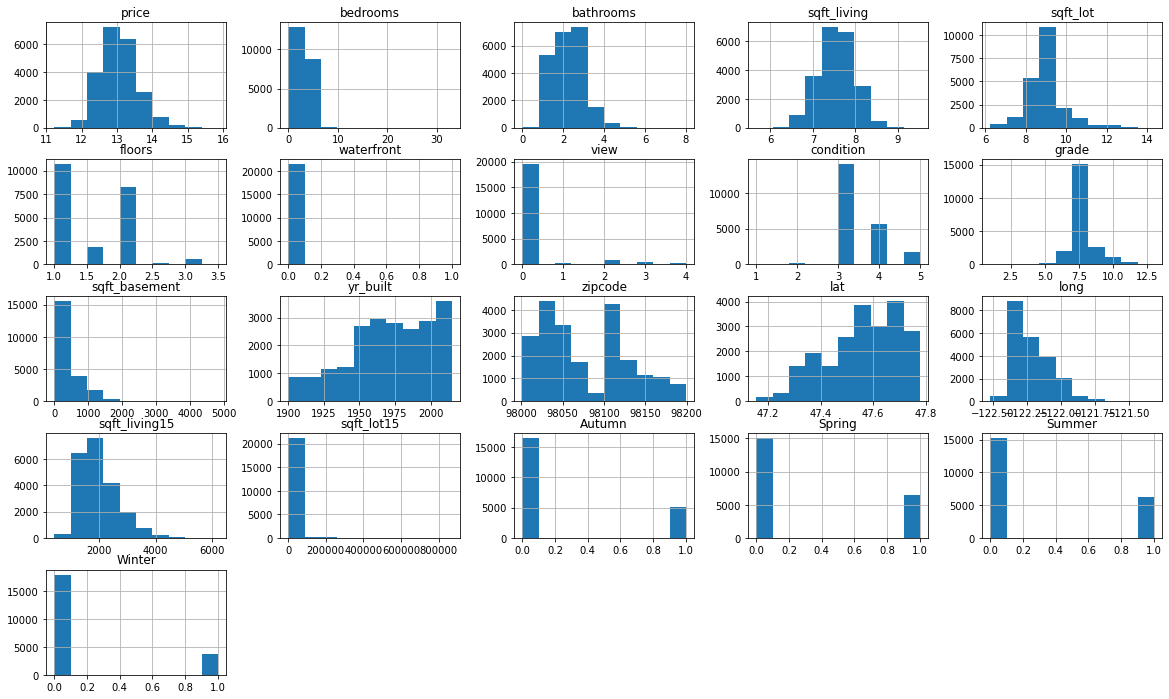

In [ ]:
#visualizing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,12))
pd.plotting.hist_frame(df1,ax= ax);

## We can scale `sqft_lot15` and `sqft_living15` looking at the visualization above

In [ ]:
#importing the library
from sklearn import preprocessing

In [ ]:
scale = preprocessing.MinMaxScaler().fit(df1[['sqft_living15','sqft_lot15']])
scale_values = scale.transform(df1[['sqft_living15','sqft_lot15']])
scale_values

array([[0.16193426, 0.00574235],
       [0.22216486, 0.00802712],
       [0.3994149 , 0.00851302],
       ...,
       [0.10686629, 0.00155764],
       [0.17398038, 0.00073057],
       [0.10686629, 0.00081098]])

In [ ]:
scale_df = pd.DataFrame(scale_values)
scale_df.rename(columns = {0:'sqft_living15',1:'sqft_lot15'},inplace=True)
scale_df

,sqft_living15,sqft_lot15
0,0.161934,0.005742
1,0.222165,0.008027
2,0.399415,0.008513
3,0.165376,0.004996
4,0.241094,0.007871
...,...,...
21608,0.194631,0.000986
21609,0.246257,0.007523
21610,0.106866,0.001558
21611,0.173980,0.000731


In [ ]:
#replacing the values with the scaled values in the df
df1['sqft_living15'] = scale_df['sqft_living15']
df1['sqft_lot15'] = scale_df['sqft_lot15']

In [ ]:
#using scaled values
outcome = 'price'
predictors = df1.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_5 = ols(formula=f,data=df1).fit()

model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3901.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:50   Log-Likelihood:                -720.17
No. Observations:               21613   AIC:                             1480.
Df Residuals:                   21593   BIC:                             1640.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7811      2.966      0.600      0.548      -4.033       7.595
bedrooms         -0.0237      0.002     -9.675      0.000      -0.028      -0.019
bathrooms         0.0702      0.004     17.602      0.000       0.062       0.078
sqft_living       0.3542      0.010     35.466      0.000       0.335       0.374
sqft_lot         -0.0387      0.003    -12.235      0.000      -0.045      -0.032
floors            0.0468      0.005      9.493      0.000       0.037       0.056
waterfront        0.4091      0.022     18.957      0.000       0.367       0.451
view              0.0655      0.003     24.600      0.000       0.060       0.071
condition         0.0546      0.003     18.946      0.000       0.049       0.060
grade             0.1616      0.003     61.630      0.000       0.156       0.167
sqft_basement -3.692e-06    5.5e-06     -0.671      0.502   -1.45e-05     7.1e-06
yr_built         -0.0040   8.53e-05    -46.796      0.000      -0.004      -0.004
zipcode          -0.0007   4.11e-05    -16.073      0.000      -0.001      -0.001
lat               1.3751      0.013    102.573      0.000       1.349       1.401
long             -0.1139      0.017     -6.859      0.000      -0.146      -0.081
sqft_living15     0.5919      0.025     24.048      0.000       0.544       0.640
sqft_lot15        0.8137      0.073     11.184      0.000       0.671       0.956
Autumn            0.4320      0.742      0.582      0.560      -1.022       1.886
Spring            0.4808      0.742      0.648      0.517      -0.973       1.934
Summer            0.4357      0.742      0.588      0.557      -1.018       1.889
Winter            0.4326      0.742      0.583      0.560      -1.021       1.886
==============================================================================
Omnibus:                      407.305   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.046
Skew:                           0.097   Prob(JB):                    3.09e-174
Kurtosis:                       3.922   Cond. No.                     1.15e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')
print('R-squared value for model_2 = ',model_2.rsquared, ' - transforming price using log transform')
print('R-squared value for model_3 = ',model_3.rsquared, ' - transforming sqft_living using log transform')
print('R-squared value for model_4 = ',model_4.rsquared, ' - transforming sqft_lot using log transform')
print('R-squared value for model_5 = ',model_5.rsquared, ' - using scaled values')

R-squared value for the baseline_model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 
R-squared value for model_2 =  0.7715173571062647  - transforming price using log transform
R-squared value for model_3 =  0.7735521196953913  - transforming sqft_living using log transform
R-squared value for model_4 =  0.7743750042560187  - transforming sqft_lot using log transform
R-squared value for model_5 =  0.7743750042560186  - using scaled values


## As we can see from the above, there is no change in the R^2 value after using the scaled values

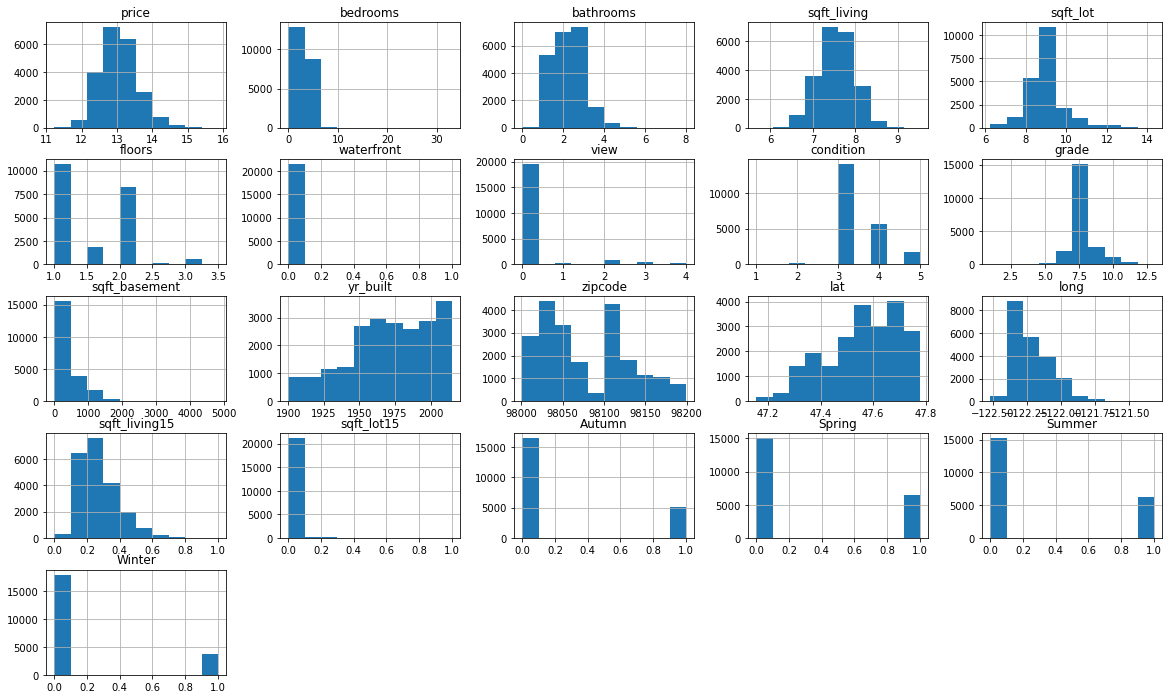

In [ ]:
#visualizing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,12))
pd.plotting.hist_frame(df1,ax= ax);

## Based on the p-values from the summary statistics, we can remove all the seasons and the size of the basement thereby concluding that they do not factor in the selling price of a house

In [ ]:
df1.drop(['Autumn','Spring','Summer','Winter','sqft_basement'],inplace=True,axis=1)

In [ ]:
#modelling with the new df
outcome = 'price'
predictors = df1.drop(['price'],axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum
model_6 = ols(formula=f,data=df1).fit()

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     4894.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:59:53   Log-Likelihood:                -801.05
No. Observations:               21613   AIC:                             1634.
Df Residuals:                   21597   BIC:                             1762.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5104      3.699      0.679      0.497      -4.741       9.761
bedrooms         -0.0233      0.002     -9.496      0.000      -0.028      -0.018
bathrooms         0.0695      0.004     17.576      0.000       0.062       0.077
sqft_living       0.3507      0.009     38.789      0.000       0.333       0.368
sqft_lot         -0.0390      0.003    -12.564      0.000      -0.045      -0.033
floors            0.0474      0.004     10.951      0.000       0.039       0.056
waterfront        0.4080      0.022     18.841      0.000       0.366       0.450
view              0.0654      0.003     24.873      0.000       0.060       0.071
condition         0.0534      0.003     18.513      0.000       0.048       0.059
grade             0.1620      0.003     61.994      0.000       0.157       0.167
yr_built         -0.0040   8.55e-05    -46.705      0.000      -0.004      -0.004
zipcode          -0.0007   4.12e-05    -15.973      0.000      -0.001      -0.001
lat               1.3740      0.013    102.532      0.000       1.348       1.400
long             -0.1108      0.017     -6.706      0.000      -0.143      -0.078
sqft_living15     0.5941      0.025     24.159      0.000       0.546       0.642
sqft_lot15        0.8251      0.073     11.363      0.000       0.683       0.967
==============================================================================
Omnibus:                      399.658   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.103
Skew:                           0.105   Prob(JB):                    4.39e-167
Kurtosis:                       3.898   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('R-squared value for the baseline_model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared, ' - removing yr_renovated ')
print('R-squared value for model_2 = ',model_2.rsquared, ' - transforming price using log transform')
print('R-squared value for model_3 = ',model_3.rsquared, ' - transforming sqft_living using log transform')
print('R-squared value for model_4 = ',model_4.rsquared, ' - transforming sqft_lot using log transform')
print('R-squared value for model_5 = ',model_5.rsquared, ' - using scaled values')
print('R-squared value for model_6 = ',model_6.rsquared, ' - dropping seasons and the basement')

R-squared value for the baseline_model =  0.700927956381505
R-squared value for model_1 =  0.7005211415851306  - removing yr_renovated 
R-squared value for model_2 =  0.7715173571062647  - transforming price using log transform
R-squared value for model_3 =  0.7735521196953913  - transforming sqft_living using log transform
R-squared value for model_4 =  0.7743750042560187  - transforming sqft_lot using log transform
R-squared value for model_5 =  0.7743750042560186  - using scaled values
R-squared value for model_6 =  0.7726801965727105  - dropping seasons and the basement


## Model diagnostics

In [ ]:
#getting predicted values
y_preds = model_6.fittedvalues
y_preds

0        12.518129
1        13.299370
2        12.846288
3        12.940788
4        12.970565
           ...    
21608    13.150331
21609    12.890803
21610    12.465554
21611    12.889894
21612    12.477357
Length: 21613, dtype: float64

In [ ]:
#R^2 values
r_squared = model_6.rsquared
r_squared

0.7726801965727105

In [ ]:
# calculating the root mean squared error.
# this will tell us how far off the model is from the predicted
# since, we have log-transformed the values, we will have to undo this to get the real-world values

from sklearn.metrics import mean_squared_error
MSE = round(mean_squared_error(y_true = np.exp(df1['price']), y_pred = np.exp(model_6.fittedvalues)),2)
# print(f'mean_squared_error = {MSE}')
RMSE = round(np.sqrt(MSE),2)
print(f'root_mean_squared_error = ${RMSE}')

root_mean_squared_error = $184335.57


### Based on the RMSE value, the model will be off by an average of USD 184,335 when it comes to predicting the price of a house

## Checking if the model fullfills linear regression assumptions

### 1. Distribution of the model residuals is normal

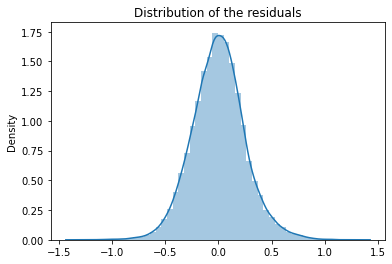

In [ ]:
residuals = model_6.resid
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

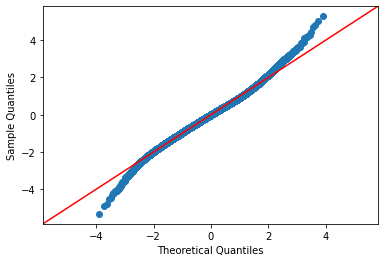

In [ ]:
# Q-Q plots
import scipy.stats as stats
residuals = model_6.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### 2. Homoscedastic - the residuals have equal variances over the entire regression model

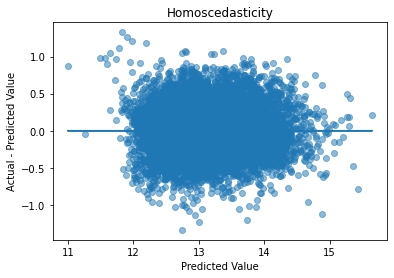

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_preds, residuals, alpha=0.5)
ax.plot(y_preds, [0 for i in range(len(df1['price']))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
ax.set_title ('Homoscedasticity');

### 3. Checking to see if there is a linear relationship

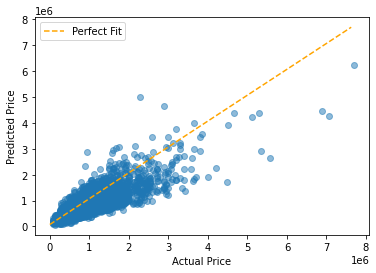

In [ ]:
predicted_values = model_6.fittedvalues
fig, ax = plt.subplots(sharex=True,sharey=True)

perfect_line = np.arange(np.exp(df1['price']).min(), np.exp(df1['price']).max())
ax.scatter(np.exp(df1['price']), np.exp(predicted_values), alpha=0.5)
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## Model Interpretation

### Since we have have transformed `price`,`sqft_lot`,`sqft_living` we need to exponentiate the same to get their natural values

### Interpreting log transformed dependent and independent varibles :

##### Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. Example: the coefficient is 0.198. For every 1% increase in the independent variable, our dependent variable increases by about 0.20%. For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100. Example: For every 20% increase in the independent variable, our dependent variable increases by about (1.20 0.198 – 1) * 100 = 3.7 percent.

### Source
> https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

## Factors affecting re-sale value

In [ ]:
# bedrooms -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[1])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of bedrooms is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the number of bedrooms is increased by 1  is -2.3%


In [ ]:
# bathrooms -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[2])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of bathrooms is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the number of bathrooms is increased by 1  is 7.2%


In [ ]:
#sqft_living was log_transfomed along with price
# calculating % increase in price for a 10% increase in the sqft_living
percent_increase = round(((1.10**model_6.params[3])-1)*100,2)
print(f'Expected precentage increase in the house value when the living area is increased by 10% is {percent_increase}%')

Expected precentage increase in the house value when the living area is increased by 10% is 3.4%


In [ ]:
#sqft_lot was log_transfomed along with price
# calculating % increase in price for a 10% increase in the sqft_lot
percent_increase = round(((1.10**model_6.params[4])-1)*100,2)
print(f'Expected precentage increase in the house value when the sqft_lot is increased by 10% is {percent_increase}%')

Expected precentage increase in the house value when the sqft_lot is increased by 10% is -0.37%


In [ ]:
# floors -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[5])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of floors is increased by 1 unit is {percent_increase}%')

Expected precentage increase in the house value if the number of floors is increased by 1 unit is 4.85%


In [ ]:
# waterfront -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[6])-1)*100,2)
print(f'Expected precentage increase in the house value if the house is on the waterfront is {percent_increase}%')

Expected precentage increase in the house value if the house is on the waterfront is 50.38%


In [ ]:
# view -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[7])-1)*100,2)
print(f'Expected precentage increase in the house value if the view is increased by 1 unit is {percent_increase}%')

Expected precentage increase in the house value if the view is increased by 1 unit is 6.76%


In [ ]:
# condition -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[8])-1)*100,2)
print(f'Expected precentage increase in the house value when condition is increased by 1 unit is {percent_increase}%')

Expected precentage increase in the house value when condition is increased by 1 unit is 5.49%


In [ ]:
# grade -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[9])-1)*100,2)
print(f'Expected precentage increase in the house value when condition is increased by 1 unit is {percent_increase}%')

Expected precentage increase in the house value when condition is increased by 1 unit is 17.58%


In [ ]:
# yr_built -  interpreted differenty since it was not log-transformed
percent_increase = round((np.exp(model_6.params[10])-1)*100,2)
print(f'Expected precentage increase in the house value when condition is increased by 1 unit is {percent_increase}%')

Expected precentage increase in the house value when condition is increased by 1 unit is -0.4%


In [ ]:
#sqft_living15 was log_transfomed along with price
percent_increase = round(((1.10**model_6.params[14])-1)*100,2)
print(f'Expected precentage increase in the house value when sqft_living15 is increased by 10% is {percent_increase}%')

Expected precentage increase in the house value when sqft_living15 is increased by 10% is 5.83%


In [ ]:
#sqft_lot15 was log_transfomed along with price
percent_increase = round(((1.10**model_6.params[15])-1)*100,2)
print(f'Expected precentage increase in the house value when sqft_lot15 is increased by 10% is {percent_increase}%')

Expected precentage increase in the house value when sqft_lot15 is increased by 10% is 8.18%


### The developed model will be off by an average of USD 184,335 when it comes to predicting the price of a house.

### A unit increase in the `grade` i.e materials that go into the building of the house will yield an increase of `17.6%`

### By adding an extra `bathroom`, the sale price goes up by `7.2%`

### A unit increase in the `condition` of the house i.e maintenance will yield an increase of approx. `5.5%`

### By increasing the `sqft_living` of the house by 10%, selling price goes by `3.4%`


# Conclusions

### 1. The model is not very accurate since the predicted values are off by USD 184,335. Other modelling techniques may yield more accurate predictions. More data might be help the current model as well

### 2. Build quality, number of bathrooms and overall condition of the house play the biggest factors when it comes to the resale value of a house